# Customer churn - analysis of the causes of behaviour

The telecommunications industry faces a significant challenge in retaining customers, commonly referred to as "churn." Understanding the factors that contribute to customer churn is critical for companies aiming to enhance customer satisfaction and reduce turnover rates. In this analysis, we will explore a dataset containing information about customers of a telecommunications company, which includes demographic details, subscription data, and whether or not the customer has churned. The goal of this study is to identify patterns and factors that influence customer churn, providing valuable insights that can guide strategies to improve customer retention. Through this analysis, we will leverage various data exploration and modeling techniques to uncover key drivers of churn and assess the impact of different features on customer behavior.

## Import libraries

In [73]:
# Import necessary libraries
import numpy as np                # linear algebra
import pandas as pd               # data processing, read CSV file   
import seaborn as sns             # data visualization
import matplotlib.pyplot as plt   # calculate plots
import missingno as msno          # calculate missing value          
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import LabelEncoder  # Convert categorical labels to numeric
from sklearn.ensemble import RandomForestClassifier # Random Forest classification model

# Initialize Plotly offline mode for interactive plots
init_notebook_mode(connected=True)

## Import data to pandas dataframe

Importing data into a Pandas DataFrame is crucial because it allows for efficient manipulation and analysis of structured data. With Pandas, we can easily clean, filter, and transform the data, making it suitable for further analysis or modeling. Additionally, DataFrames provide a user-friendly interface to work with large datasets and integrate well with other libraries for visualization and machine learning tasks.

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

### Displaying column names

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Info about data structure 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Info of data

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data preparation

Identifying missing values using a bar plot is useful because it provides a clear and visual representation of the extent of missing data in each column of the dataset. This allows to quickly assess which variables have significant gaps and may need to be handled (e.g., imputation or removal). By visualizing missing data, it helps to mae a decision about data cleaning strategies and avoid potential issues during analysis or modeling.

As the analysis shows, all the data is complete with 100% accuracy, and there are no missing values.

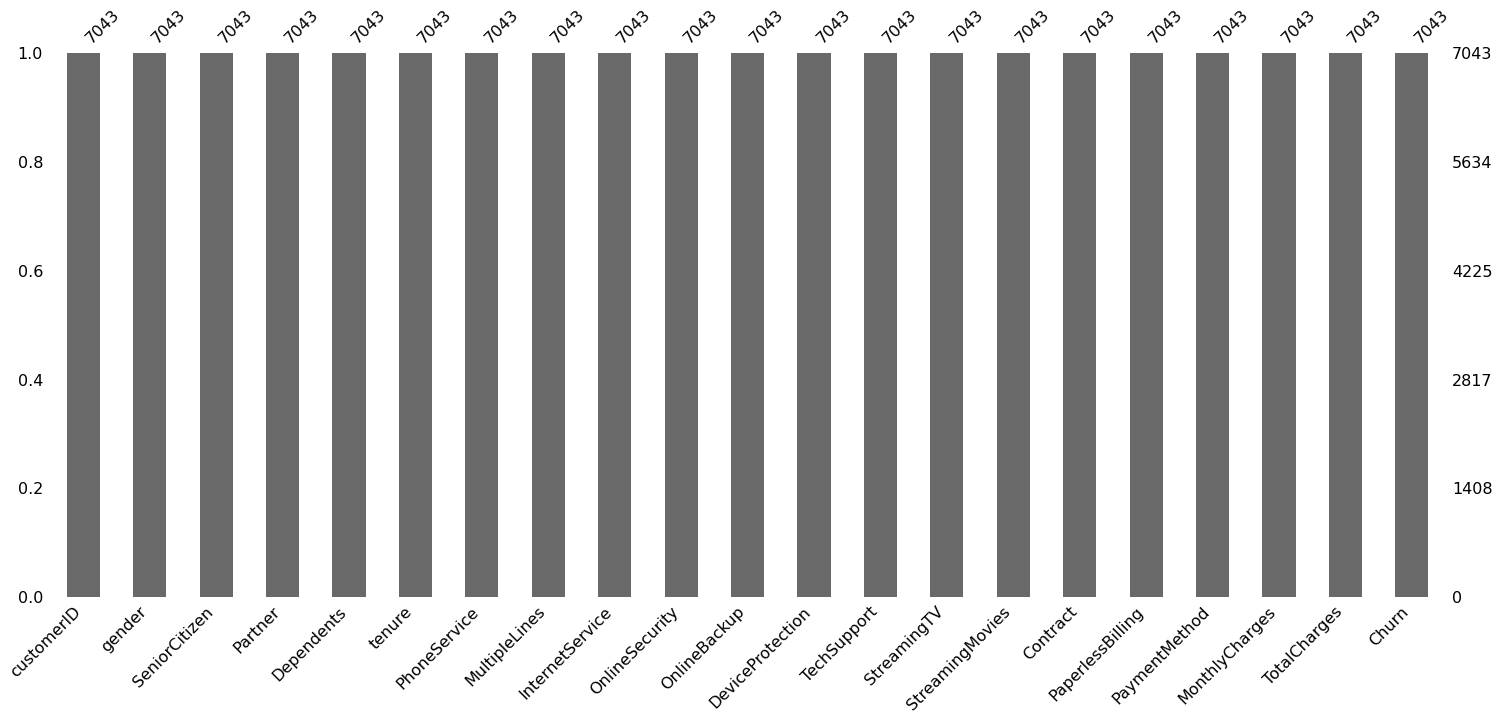

In [11]:
msno.bar(df)
plt.show()

## Data Analysis

### Churn and Non-Churn Customers Proportion

The purpose of analyzing the proportion of churn and non-churn customers is to understand the distribution of customers who have left the service versus those who have remained. This analysis helps identify whether customer churn is a significant issue for the business. The results show the relative proportions of customers who have churned and those who have stayed, providing insights into customer retention and potential areas for improvement.

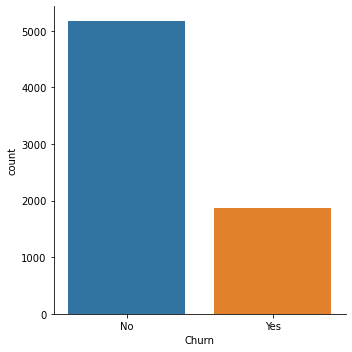

In [18]:
df['Churn'].value_counts()
sns.catplot(data=df, x="Churn", kind="count");

## Creating Separate Datasets: Churn and non-churn

Separate datasets for churned (Churn = Yes) and non-churned (Churn = No) customers are created to analyze and compare the characteristics, behaviors, and patterns of each group, helping to identify the factors that contribute to customer retention and churn.

In [13]:
#Churn yes dataset
churn_yes = pd.DataFrame(df.query('Churn == "Yes"'))
#Churn no dataset
churn_no = pd.DataFrame(df.query('Churn == "No"'))

### Distribution of Gender


The distribution of gender is analyzed to determine if there are any gender-based differences in customer behavior or churn patterns. The results show that the customer base is almost evenly split between male and female customers, indicating that gender does not have a significant impact on customer retention or churn trends.

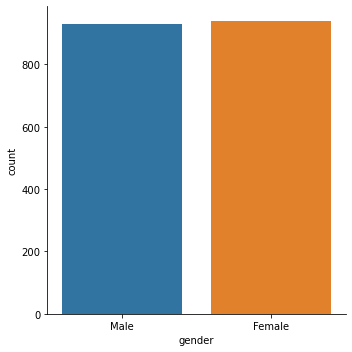

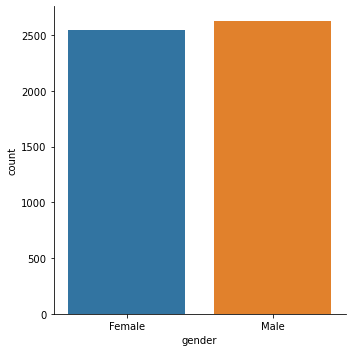

In [16]:
sns.catplot(data=churn_yes, x="gender", kind="count");
sns.catplot(data=churn_no, x="gender", kind="count");

## Percentage of Senior Citizens

Analyzing the proportion of senior citizens in the dataset is important because older individuals may have different needs and preferences regarding services, which could influence their decisions to stay or leave (churn). Studying this group helps understand whether seniors are more likely to churn or remain loyal, and it can assist in tailoring marketing strategies, offers, or support specifically for this customer segment.

Text(0.5, 1.0, 'Proportion of Senior Citizens in Churned Customers')

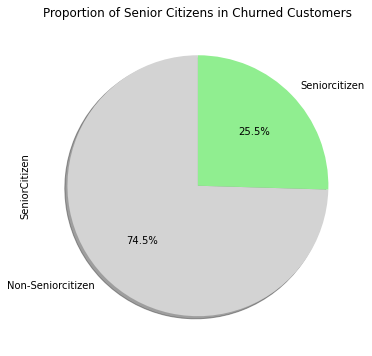

In [23]:
churn_yes['SeniorCitizen'].value_counts().plot(kind='pie',
                                                figsize=(8,6),
                                                colors = ['lightgrey', 'lightgreen'],
                                                autopct='%1.1f%%',
                                                shadow = True,
                                                startangle=90,
                                                labels=["Non-Seniorcitizen", "Seniorcitizen"])
plt.title("Proportion of Senior Citizens in Churned Customers")

Text(0.5, 1.0, 'Proportion of Senior Citizens in Non-Churned Customers')

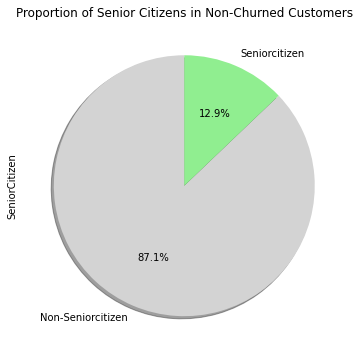

In [25]:
churn_no['SeniorCitizen'].value_counts().plot(kind='pie',
                                                figsize=(8,6),
                                                colors = ['lightgrey', 'lightgreen'],
                                                autopct='%1.1f%%',
                                                shadow = True,
                                                startangle=90,
                                                labels=["Non-Seniorcitizen", "Seniorcitizen"])
plt.title("Proportion of Senior Citizens in Non-Churned Customers")

The result showing 25% and 12% for senior and non-senior citizens, respectively, indicates the proportion of senior citizens within the churned customer dataset. The significance of these values depends on the context of the analysis. If the senior citizens’ percentage is notably high compared to non-senior citizens, it could suggest that seniors are more prone to churn, or it could reflect the demographic composition of the customers.

To determine if this difference is meaningful, it need to be compared it against the overall dataset or industry benchmarks. If the proportion of senior citizens in the churned group is disproportionately higher compared to the general customer base, it might indicate that senior citizens are more likely to churn, which would be worth investigating further.

## Distribution of Internet Service

The purpose of analyzing the distribution of InternetService among churned and non-churned customers is to identify any potential patterns or correlations between the type of internet service customers use and their likelihood to churn. By comparing the counts of different types of internet services in both groups, we can determine whether certain service types are more commonly associated with customer retention or churn. This analysis can provide valuable insights into which internet services might require special attention or improvement to reduce churn and enhance customer satisfaction.

In [104]:
InternetService=pd.DataFrame(churn_yes['InternetService'].value_counts().reset_index())
InternetService.rename(columns={'index':'InternetService_churn_yes','InternetService':'counts_yes'},inplace=True)
InternetService_no=pd.DataFrame(churn_no['InternetService'].value_counts().reset_index())
InternetService_no.rename(columns={'index':'InternetServicechurn_no','InternetService':'counts_no'},inplace=True)
InternetService_status=pd.concat([InternetService,InternetService_no],axis=1)
InternetService_status

,InternetService_churn_yes,counts_yes,InternetServicechurn_no,counts_no
0,Fiber optic,1297,DSL,1962
1,DSL,459,Fiber optic,1799
2,No,113,No,1413


In [40]:
# Create the figure
fig = go.Figure()

# Churn Yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Fiber optic', 'DSL', 'No'],
                     y=[1297, 459, 113],
                     marker_color='grey'))

# Churn No
fig.add_trace(go.Bar(name='Churn No',
                     x=['Fiber optic', 'DSL', 'No'],
                     y=[1799, 1962, 1413],
                     marker_color='lightblue'))

# Update the layout
fig.update_layout(title='Internet Service',
                  autosize=False,
                  width=500,
                  height=500,
                  barmode='group')

# Update the axes
fig.update_xaxes(title='Different Internet Services')
fig.update_yaxes(title='Counts')

# Save the plot as an image file (when import as Jupyter notebook plot disappears)
fig.write_image("internet_service.png")

# Display the figure
fig.show()

The analysis shows that among churned customers, Fiber optic is the most common service (1,297 customers), followed by DSL (459 customers). No internet service is used by 113 churned customers.

For non-churned customers, DSL is the most common service (1,962 customers), followed by Fiber optic (1,799 customers). No internet service is used by 1,413 non-churned customers.
Insights:

- Fiber optic is more common among churned customers, suggesting it might be linked to higher churn.
-  DSL is more prevalent among non-churned customers, possibly indicating higher retention.

## Distribution of Tenure

Tenure refers to the length of time a customer has been with a company. In the context of customer churn analysis, tenure typically represents the number of months a customer has had an active subscription. It is an important variable for understanding customer behavior, as shorter tenures may indicate early churn, while longer tenures suggest customer loyalty.

For example, in the dataset, tenure can help identify trends such as whether newer customers are more likely to leave or if long-term customers tend to stay.

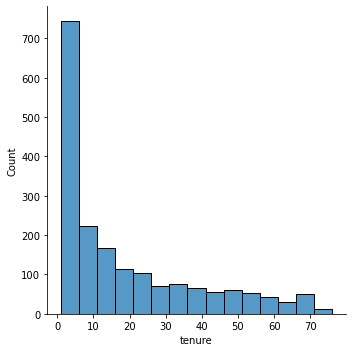

In [38]:
sns.displot(churn_yes, x="tenure", binwidth=5);

The results show that churn is highest in the first month (obove 700 customers) and then gradually decreases, with around 100 churned customers in later months and continuing to decline over time.
Key Insights:

1. Early Churn is a Major Issue: Many customers leave in the first month, indicating potential dissatisfaction, unmet expectations, or issues with onboarding.


2. Churn Declines Over Time: The longer a customer stays, the less likely they are to churn, suggesting that once customers are engaged, they tend to remain.


3. Possible Causes:
    - Customers may leave if the service doesn’t meet their expectations early on.
    - Some customers may have signed up for short-term needs and left quickly.
    - Long-term customers may be more loyal due to familiarity, habit, or bundled services.

## Distribution of Phone Service

Analyzing the distribution of Phone Service among churned and non-churned customers helps determine if phone service plays a role in customer retention.
Key Aspects to Investigate:

- Do customers with Phone Service churn more or less frequently?
- Are there differences in churn rates between customers who only have internet service versus those with both phone and internet?

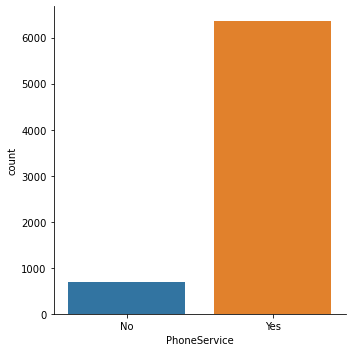

In [121]:
sns.catplot(data=df, x="PhoneService", kind="count");

In [43]:
color = {"Yes": 'blue', "No": 'green'}
fig = px.histogram(df, x="Churn", 
                       color="PhoneService", 
                       barmode="group", 
                       color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with Phone Service')

# Save the plot as an image file (when import as Jupyter notebook plot disappears)
fig.write_image("phone_service.png")

fig.show()

This chart visualizes the distribution of Phone Service among churned (Churn Yes) and non-churned (Churn No) customers.
Key Observations:

- The bars show how many churned and non-churned customers had Phone Service or not.
- If a significant difference exists between the groups, it could indicate that Phone Service influences churn behavior.

In [44]:
# Count the number of customers in each category
phone_churn_yes = df[df['Churn'] == 'Yes']['PhoneService'].value_counts(normalize=True) * 100
phone_churn_no = df[df['Churn'] == 'No']['PhoneService'].value_counts(normalize=True) * 100

# Display the results
phone_service_comparison = pd.DataFrame({'Churn Yes (%)': phone_churn_yes, 'Churn No (%)': phone_churn_no})
print(phone_service_comparison)


     Churn Yes (%)  Churn No (%)
Yes      90.904227     90.104368
No        9.095773      9.895632


The percentage of customers with Phone Service is nearly identical between churned and non-churned groups:

- 90.9 % of churned customers had Phone Service, compared to 90.1 % of non-churned customers.
- 9.1 % of churned customers did not have Phone Service, compared to 9.9 % of non-churned customers.

Key Takeaways:

- The difference is very small, suggesting that Phone Service does not significantly impact churn.
- Since the proportions are nearly the same, other factors (e.g., Internet Service, contract type, or tenure) are likely more influential in churn behavior.
- There is no strong evidence that having or not having Phone Service affects customer retention.

## Analysis of Payment Method and Churn

1. Distribution of Payment Methods - the first plot shows the overall distribution of payment methods used by customers. This helps understand which payment methods are most popular.
    

2. Payment Method and Churn - the second plot breaks this down further, showing how different payment methods relate to churn. The hue (‘Churn’) separates customers who stayed and those who left, helping identify patterns.

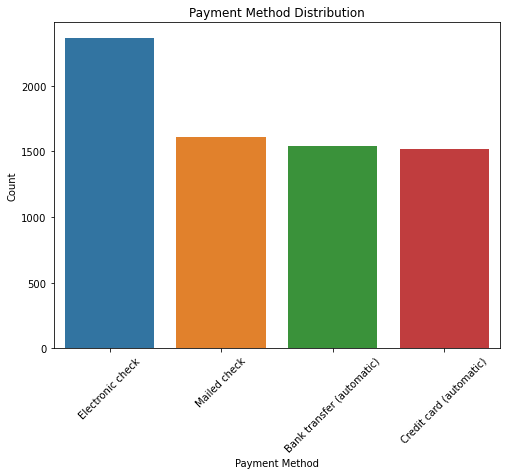

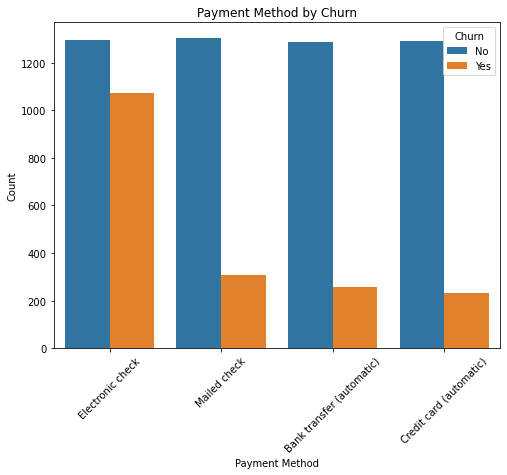

In [47]:
# Payment method distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Payment method and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the analysis, it appears that Electronic Check is the most common payment method among churned customers. This observation may indicate a potential issue, as customers using Electronic Check are more likely to churn compared to other payment methods.

## Charges distribution

Analyzing the distribution of monthly charges and its relationship with churn helps identify potential factors that may influence customers' decisions to cancel their service:
1. Distribution of Monthly Charges - the first plot shows the overall distribution of monthly charges. It helps us understand the spread of charges across the dataset, with the KDE (Kernel Density Estimate) highlighting the concentration of values.

    - **Kernel Density Estimate (KDE)** is a statistical method used to estimate the probability density function of a continuous random variable. It smooths the data by applying a kernel (usually a Gaussian) to each data point, allowing us to visualize the distribution shape, identify peaks, and observe the overall density without assuming a specific distribution shape, making it useful for detecting patterns in data.


2. Monthly Charges by Churn - The second plot compares monthly charges for churned vs. non-churned customers using a boxplot. This helps to identify if there is any significant difference in the charges paid by customers who stayed versus those who left.

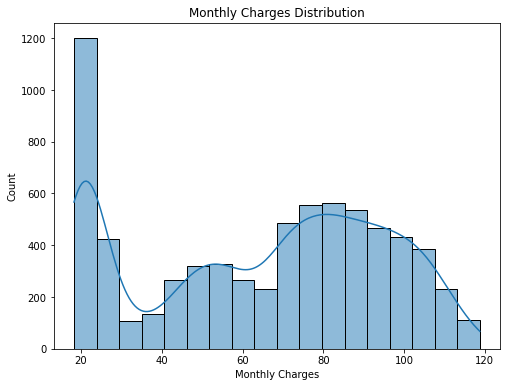

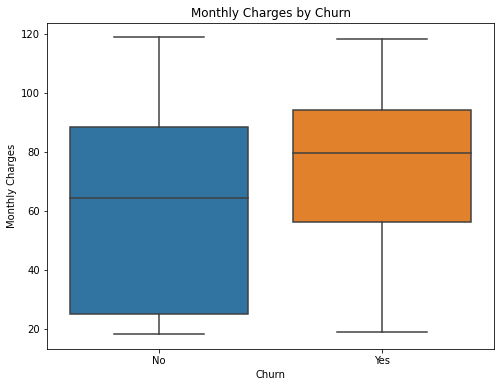

In [50]:
# Monthly charges distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Average monthly charges for churned vs. non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Customers with higher monthly charges are more likely to churn. It suggests that price sensitivity may be a key factor in customer retention. These customers might feel that the service is not worth the higher cost they are paying, or they might find cheaper alternatives elsewhere.

## Correlation Heatmap Analysis

The correlation heatmap visually represents the relationships between various numerical variables in the dataset. It shows how strongly each pair of features is related to each other. The values in the heatmap range from -1 to 1, where:

- 1 indicates a perfect positive correlation (as one variable increases, the other does as well).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
- 0 indicates no correlation.

Strong positive correlations can indicate similar behavior between features, while negative correlations might suggest inverse relationships. Features with low or no correlation might not have a significant impact on each other, helping focus on the most important factors for further analysis.

Only 3 columns dataset are numerical (continuous data) and thus suitable for correlation analysis. Correlation works between numerical variables.

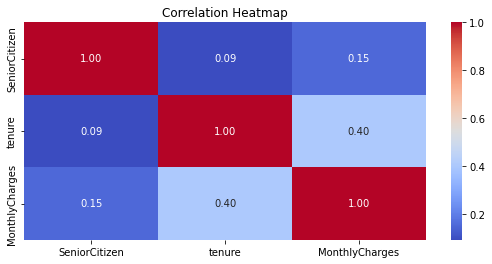

In [56]:
# Correlation heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(churn_yes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation values in heatmap are ranging from 0.09 to 0.40, this indicates that the relationships between the variables are weak to moderate. These values mean that:

- 0.09 to 0.30: A weak correlation — the variables are somewhat related, but the relationship is not very strong.
- 0.30 to 0.40: A moderate correlation — the variables are somewhat related with a more noticeable connection, but it's not a very strong or perfect correlation.

## Analysis of Feature Importance using Random Forest

This analysis involves encoding categorical variables, training a Random Forest Classifier, and then evaluating the importance of each feature in predicting churn.

**Key Steps in the Process:**

1. Encoding Categorical Variables: categorical variables (like PaymentMethod, InternetService, etc.) are encoded into numeric values using Label Encoding. This transformation allows the algorithm to handle categorical data.


2. Training the Random Forest Model: the Random Forest model is trained to predict the Churn column based on the other features in the dataset. X represents the features (independent variables), and y represents the target variable (Churn).


3. Feature Importance: after training the model, the feature importance scores are calculated. This shows which features are the most influential in predicting churn. The features with higher importance values contribute more to the model's predictions.


4. Visualization: a bar plot is created to show the relative importance of each feature in descending order. The higher the bar, the more important the feature is.


This analysis helps in identifying which features have the strongest impact on customer churn. Features with low importance can potentially be removed from the model, which can lead to faster training times and a more interpretable model.

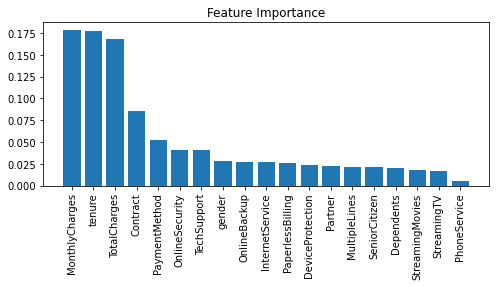

In [68]:
# Encode categorical variables
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Train a Random Forest model
X = df_encoded.drop(columns=['Churn', 'customerID'])
y = df_encoded['Churn']
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8, 3))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

Three features with an importance value of 0.175, one more or less 0.080 and the rest of the features with values around 0.025, this indicates that those three features are significantly more important than the others in predicting churn. 

1. Top Three Features (0.175 importance):

- These features have the most influence on the model’s ability to predict churn. They contribute substantially to the model’s decision-making process.
    
- If the importance value is 0.175, it means that these features are among the strongest predictors of churn, relative to all other features in the dataset.

2. Contract value (0.080 importance):
- A value of 0.08 is low compared to the more dominant features (e.g., 0.175 or 0.8), which suggests that this feature has a moderate impact on the model's prediction of churn, but it is not the main driver.


3. Remaining Features (~0.025 importance):
- The features with importance values around 0.025 are relatively unimportant in predicting churn.

In [125]:
#source of data: 
#https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/data